In [1]:
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import scanpy as sc

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
expression = sc.read_h5ad('../benchmarking/sandbox/figure_data_v3/cross_disease_predictions_panimmune_breast_module_smol.h5ad')
expression

AnnData object with n_obs × n_vars = 390210 × 28
    obs: 'cell_type', 'predicted_cell_type', 'disease', 'model_dataset', 'manual_teir1_annotation'
    var: 'cell_type'
    obsm: 'pollock_embedding', 'pollock_umap'
    layers: 'logcounts'

In [4]:
explain = sc.read_h5ad('../benchmarking/sandbox/figure_data_v3/explain_feature_adata_panimmune_breast_module.h5ad')
explain

AnnData object with n_obs × n_vars = 4990 × 27131
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'ident', 'predicted_cell_type', 'cell_type_probability', 'probability_B cell', 'probability_CD4 T cell', 'probability_CD4 T cell - activated', 'probability_CD4 T cell - exhausted', 'probability_CD8 T cell - CTL', 'probability_CD8 T cell - exhausted', 'probability_CD8 T cell - preexhausted', 'probability_CD8 T cell - proliferating', 'probability_Mast', 'probability_Monocyte/Macrophage', 'probability_NK', 'probability_NKT', 'probability_Plasma', 'probability_Treg', 'probability_cDC1', 'probability_cDC2', 'probability_pDC', 'disease', 'leiden'
    var: 'mean', 'std'
    uns: 'dendrogram_predicted_cell_type', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [20]:
marker_genes = {
    'B cell': ['MS4A1'],
    'CD4 T cell': ['CD3G', 'CD4'],
    'CD8 T cell': ['CD8A'],
    'T cell - Activated': ['CD69', 'CD28'],
    'T cell - Naive': ['IL7R'],
    'T cell - Effector': ['GZMA'],
    'T cell - Memory': ['CX3CR1'],
    'T cell - Regulatory': ['FOXP3'],
    'T cell - pre-exausted': ['GZMK'],
    'T cell - exausted': ['PDCD1', 'LAG3'],
    'T cell - proliferating': ['MKI67', 'TOP2A'],
    'NK': ['GNLY', 'CD7'],
    'NK - Strong': ['NKG7'],
    'NK - Weak': ['NCAM1'],
    'Mast': ['KIT', 'FCER1A'],
    'Macrophage': ['CD14', 'FCGR3A', 'LYZ'],
    'cDC': ['BATF3','IDO1'],
    'pDC': ['IL3RA'],
    'Plasma': ['SDC1'],
}
order = ['B cell', 'CD4 T cell', 'CD8 T cell', 'T cell - Activated', 'T cell - Naive', 'T cell - Effector',
        'T cell - Memory', 'T cell - Regulatory', 'T cell - pre-exausted', 'T cell - exausted',
        'T cell - proliferating', 'NK', 'NK - Strong', 'NK - Weak', 'Mast', 'Macrophage', 'cDC', 'pDC',
        'Plasma']
markers = []
for k in order: markers += marker_genes[k]
markers

['MS4A1',
 'CD3G',
 'CD4',
 'CD8A',
 'CD69',
 'CD28',
 'IL7R',
 'GZMA',
 'CX3CR1',
 'FOXP3',
 'GZMK',
 'PDCD1',
 'LAG3',
 'MKI67',
 'TOP2A',
 'GNLY',
 'CD7',
 'NKG7',
 'NCAM1',
 'KIT',
 'FCER1A',
 'CD14',
 'FCGR3A',
 'LYZ',
 'BATF3',
 'IDO1',
 'IL3RA',
 'SDC1']

In [26]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [116]:
sc.settings.figdir = '../benchmarking/sandbox/figure_data_v3/'

/home/estorrs/miniconda3/envs/pollock_dev/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


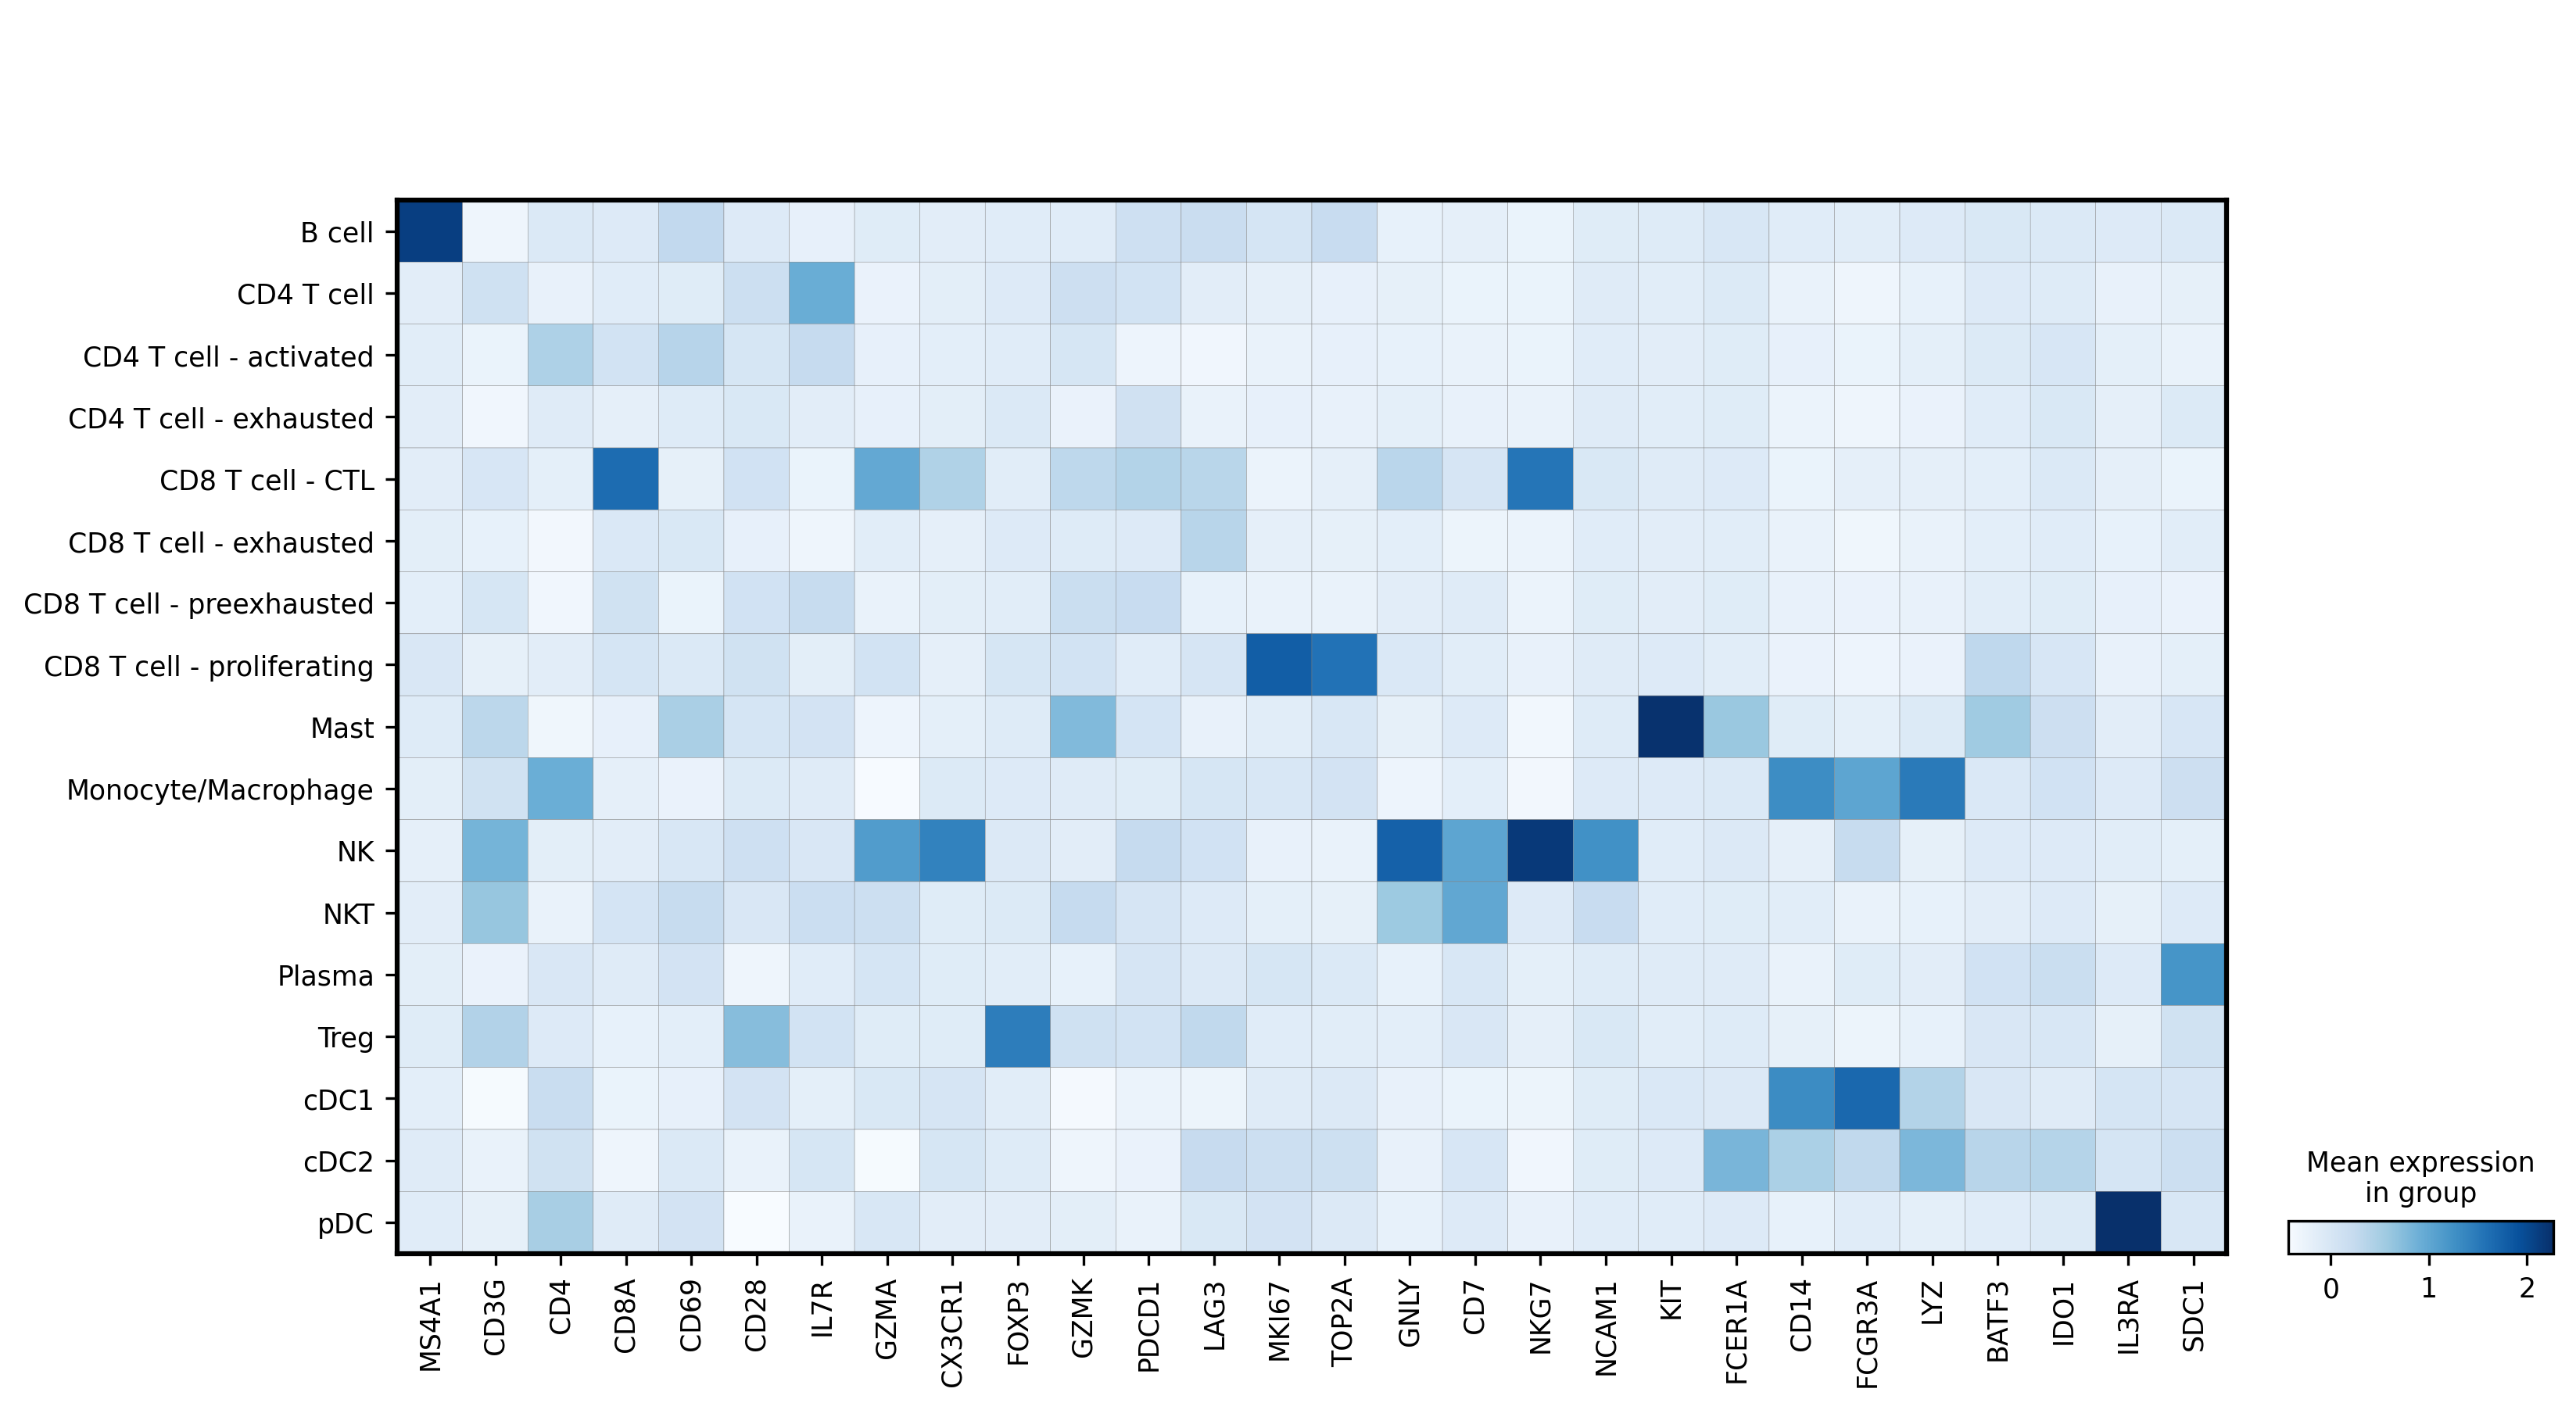

In [118]:
sc.pl.matrixplot(explain, markers, groupby='predicted_cell_type', cmap='Blues', save='feature_squares.pdf')

/home/estorrs/miniconda3/envs/pollock_dev/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


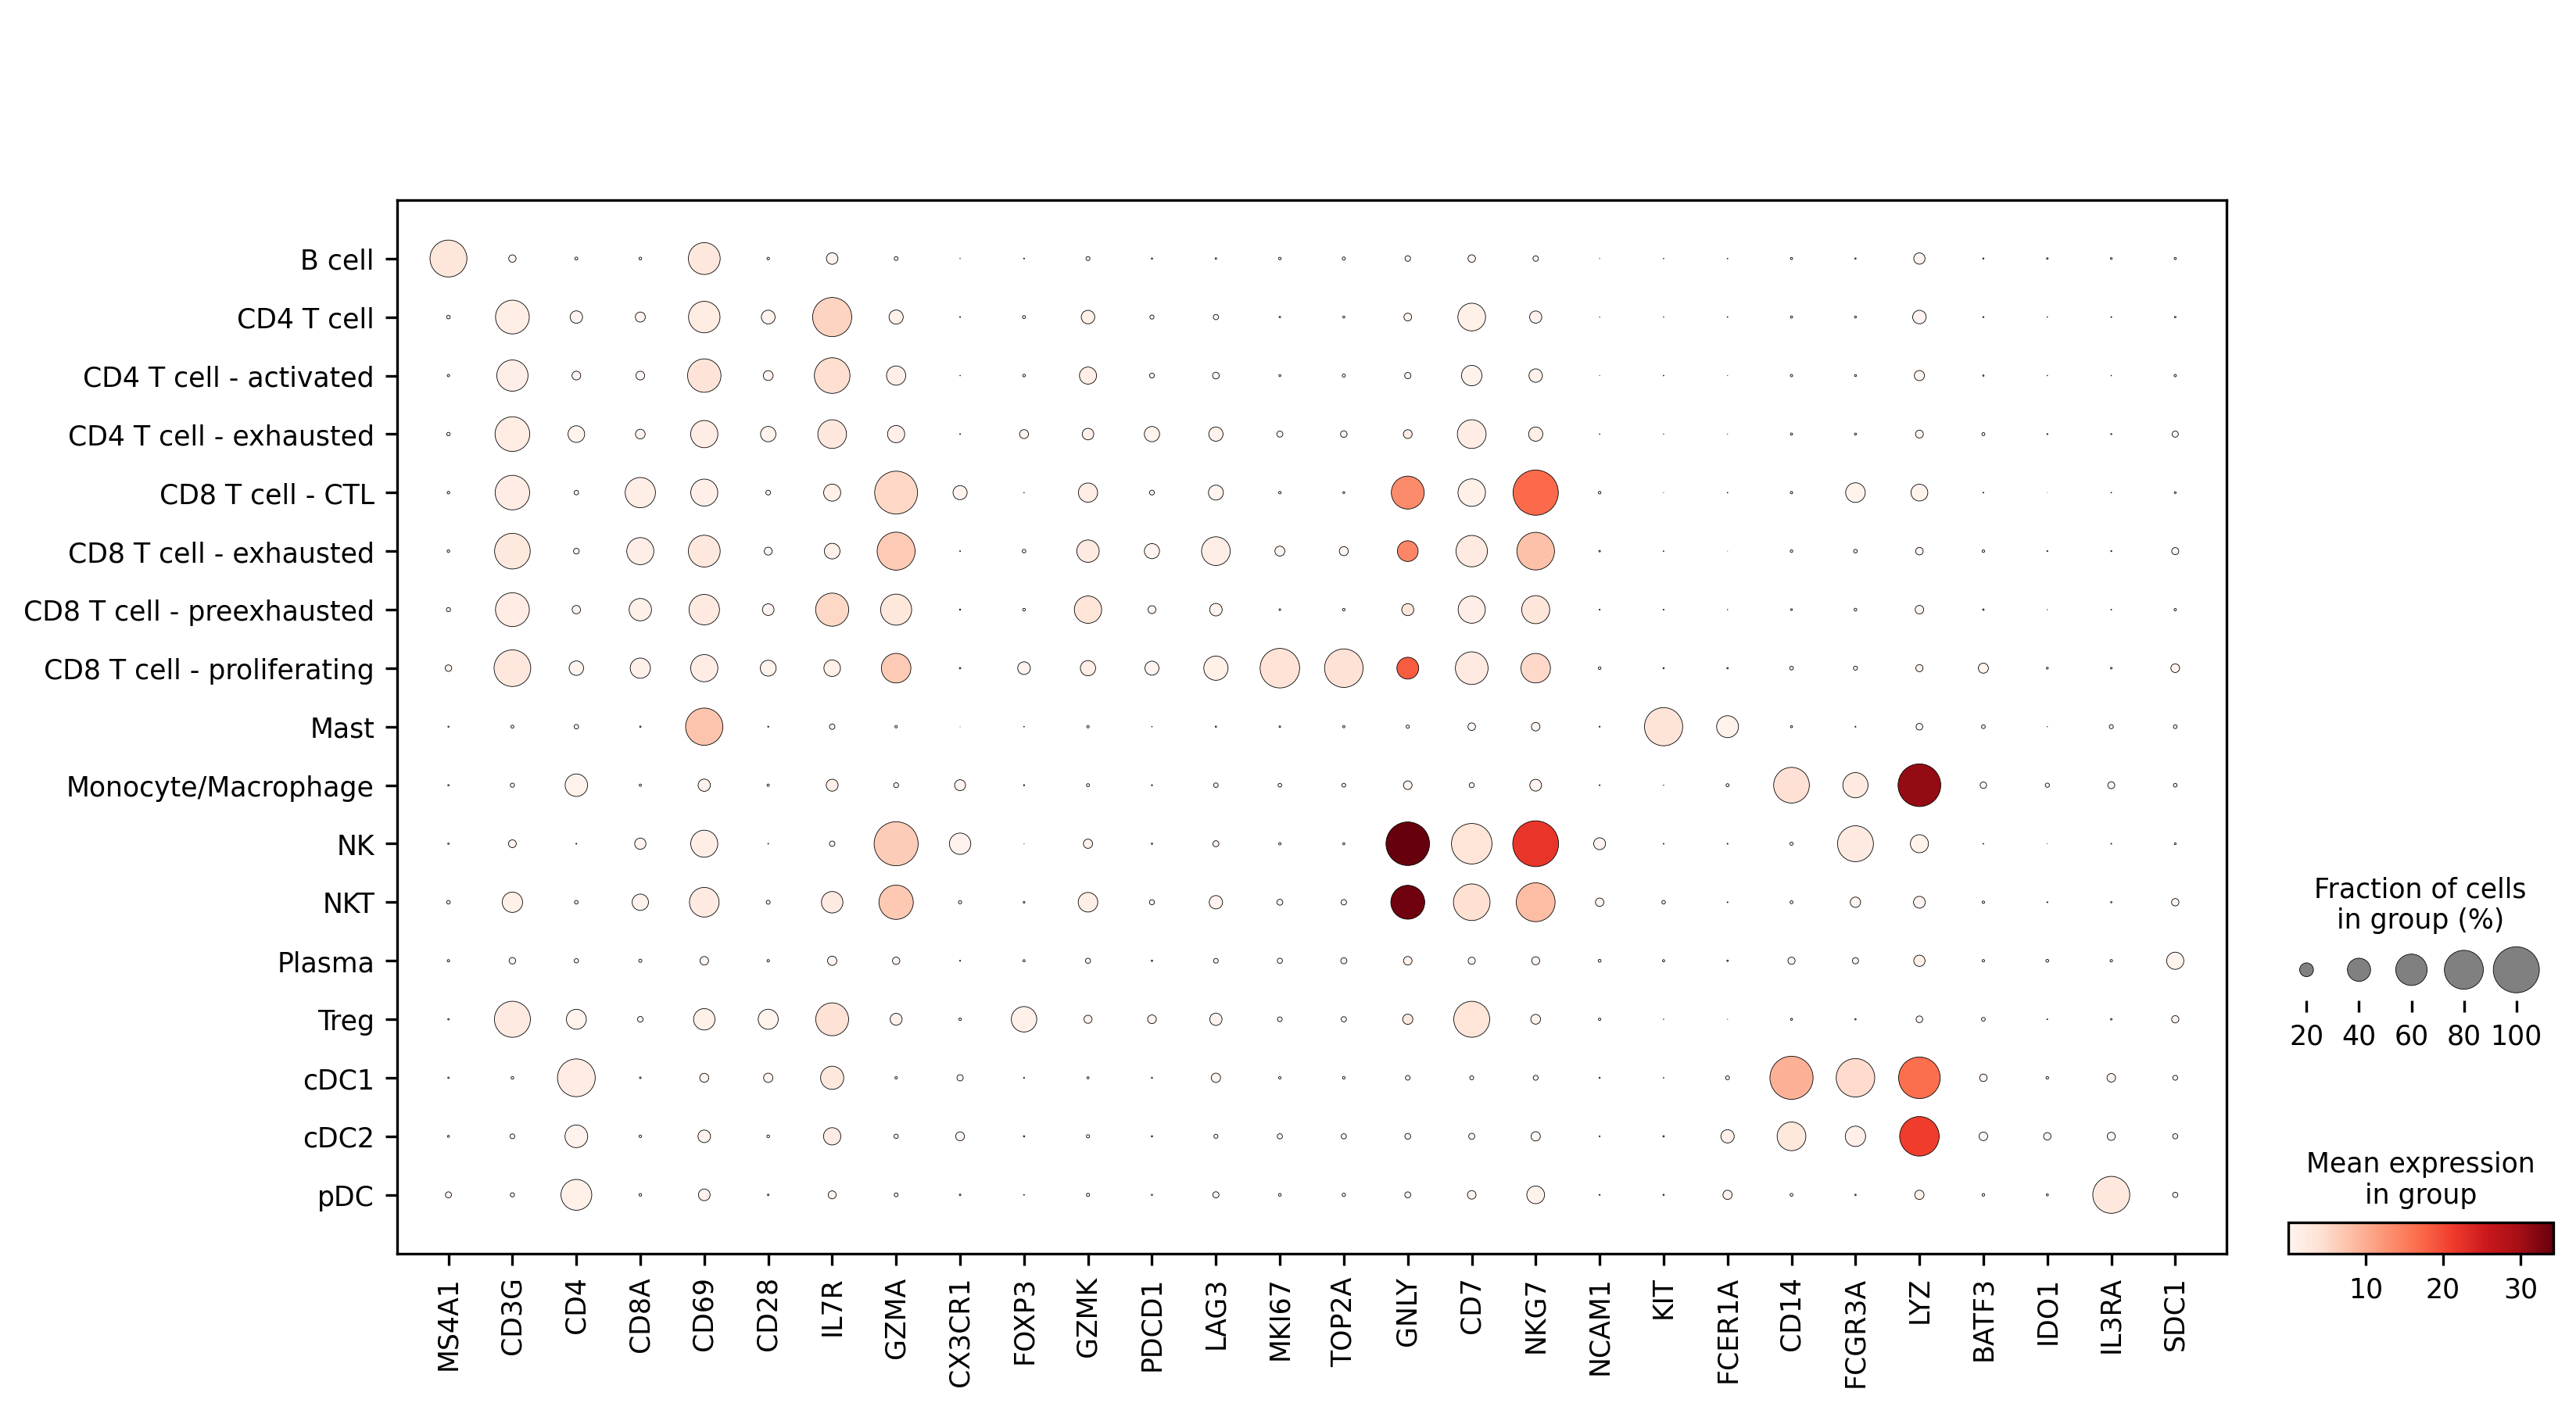

In [117]:
sc.pl.dotplot(expression, markers, groupby='predicted_cell_type', save='expression_dots.pdf')

/home/estorrs/miniconda3/envs/pollock_dev/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/estorrs/miniconda3/envs/pollock_dev/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  # Remove the CWD from sys.path while we load stuff.


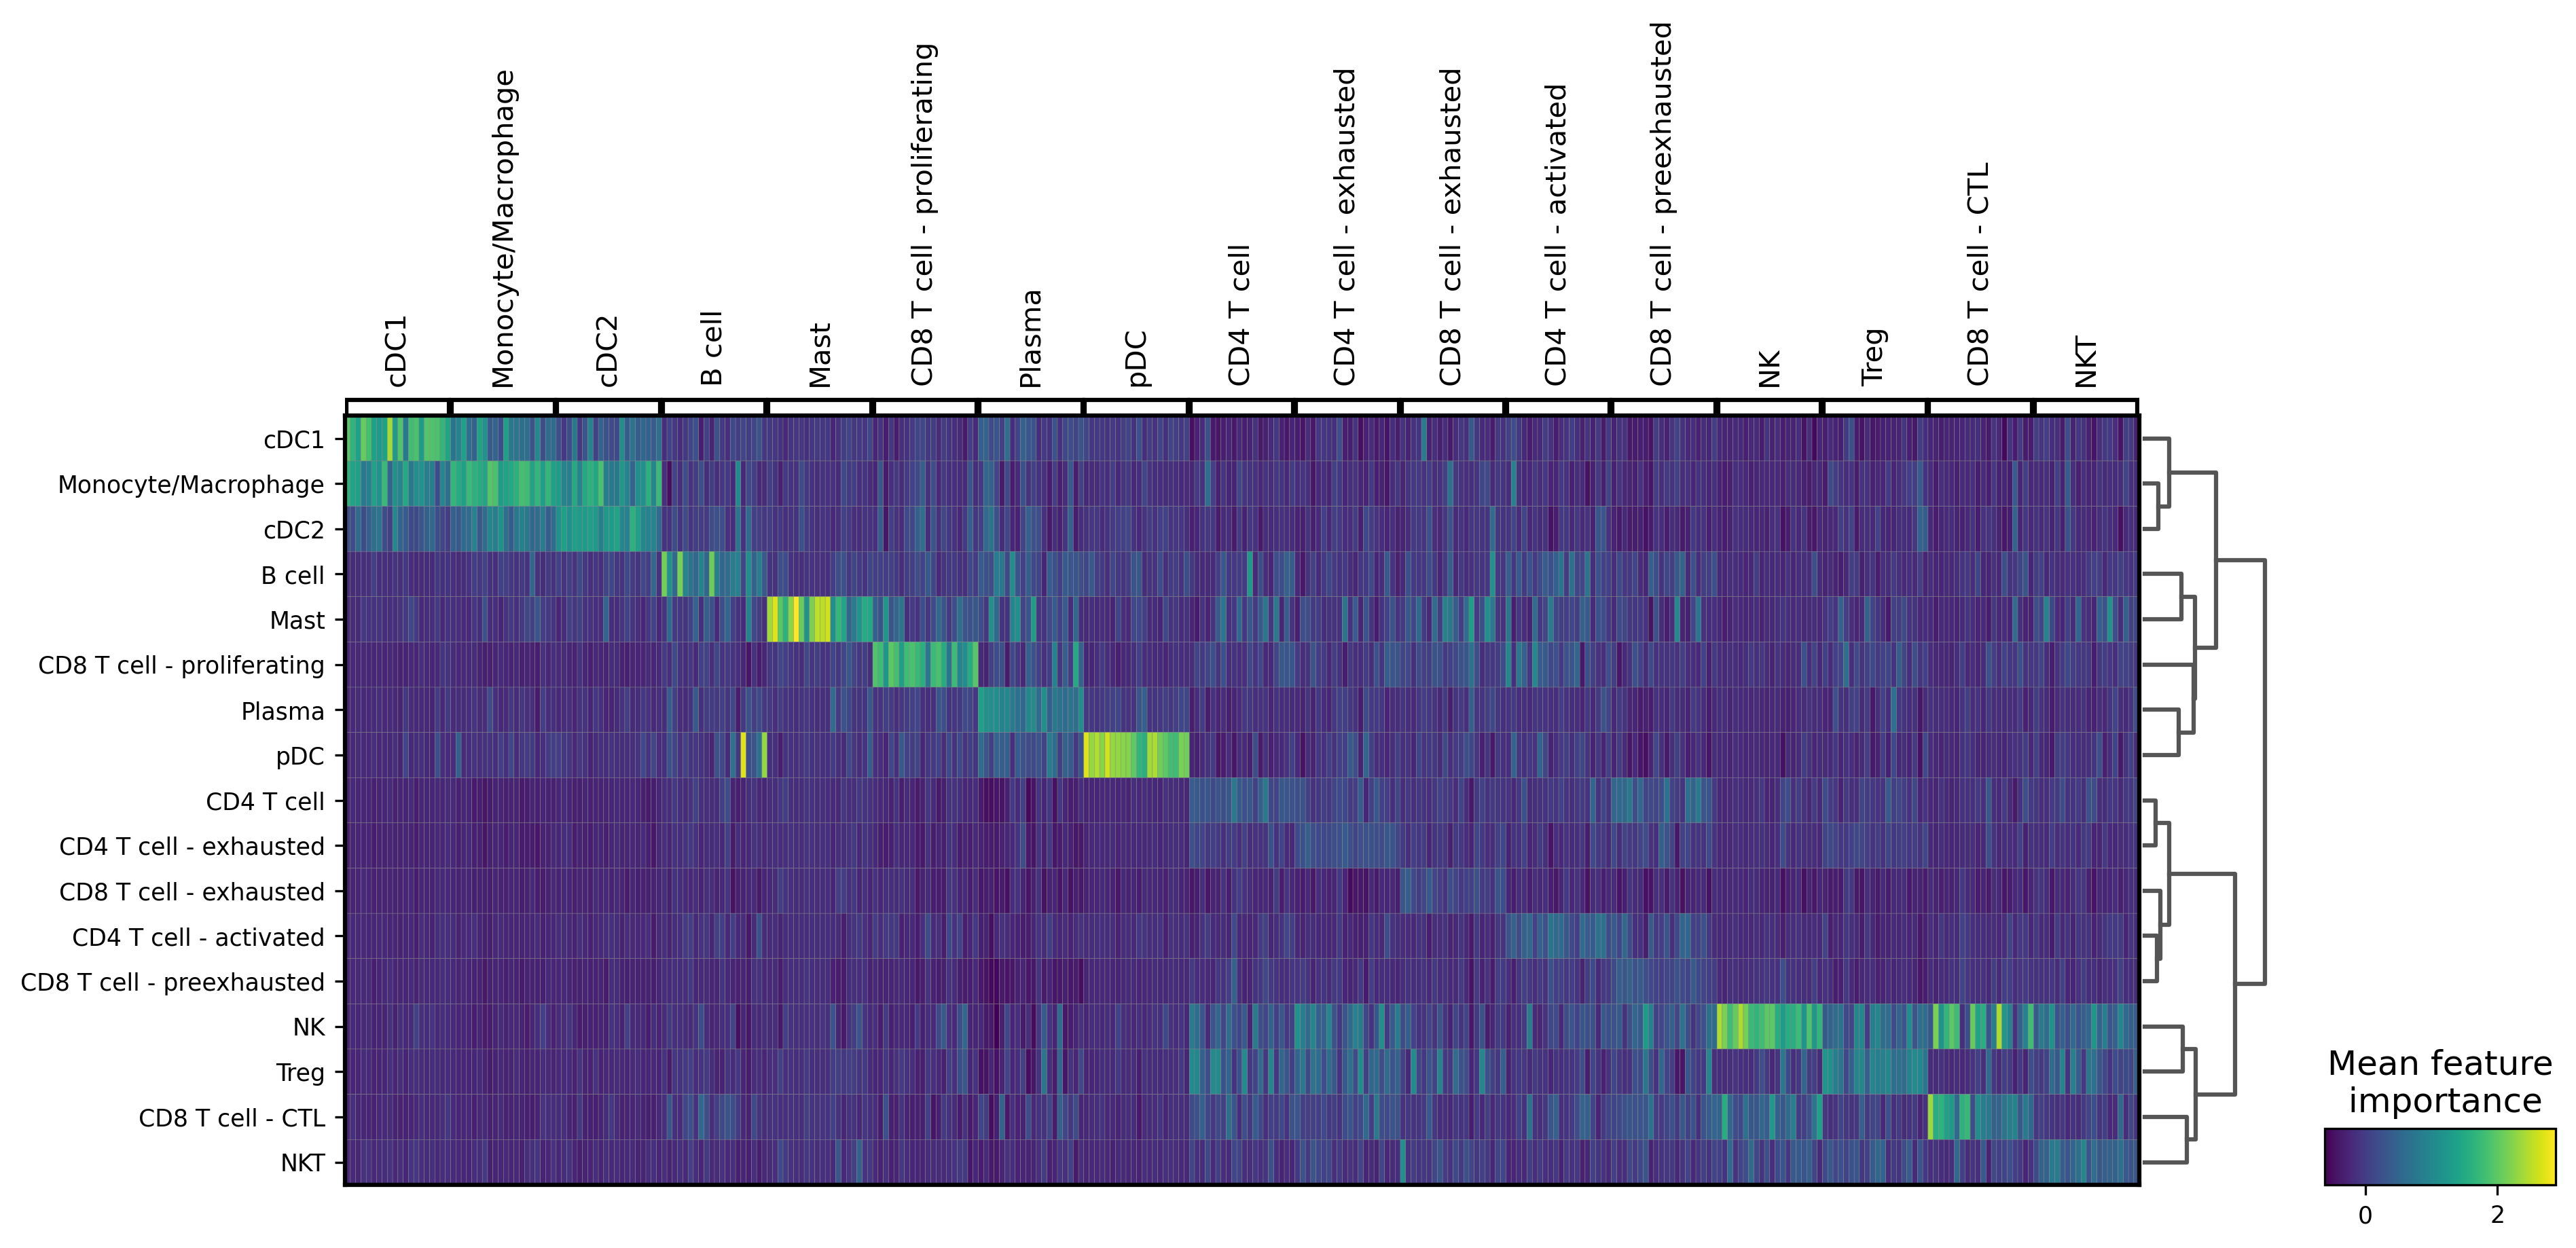

In [119]:
axs = sc.pl.rank_genes_groups_matrixplot(explain, groupby='predicted_cell_type', n_genes=20, show=False,
                                         figsize=(14, 5))
# plt.xticks([])
# plt.xlabel('')

axs['mainplot_ax'].set_xticks([])
axs['mainplot_ax'].set_xlabel('')
axs['color_legend_ax'].set_title('Mean feature\n importance')

plt.tight_layout()
plt.savefig('../benchmarking/sandbox/figure_data_v3/rank_feature_importances.pdf')


In [65]:
n = 20
pathways = {}

In [61]:
for g in explain.uns['rank_genes_groups']['names']['CD8 T cell - proliferating'][:n]: print(g)

TYMS
TUBB
TUFM
MAD2L1
MCM7
CDC123
MKI67
NUSAP1
HMGB2
TUBA1B
F8A1
STMN1
RANBP1
HMGB1
LRRC40
RRM2
ADRM1
PSMA2
HMGN2
PCLAF


In [76]:
import pandas as pd
import numpy as np
go_pathways = pd.read_csv('../benchmarking/sandbox/topfunn/t_proliferating.txt',
                         sep='\t')
go_pathways['-log10(FDR)'] = [-np.log10(x) for x in go_pathways['q-value FDR B&H']]
go_pathways['Genes in pathway'] = go_pathways['Hit Count in Query List'].to_list()
pathways['CD8 T cell - proliferating'] = go_pathways

In [67]:
for g in explain.uns['rank_genes_groups']['names']['CD8 T cell - exhausted'][:n]: print(g)

LINC01871
IFNG
TNFRSF9
MTERF3
VCAM1
LAG3
NFRKB
RASGRP1
PADI4
PTPN22
SYT11
ZNF599
UTP3
PUF60
LINC00158
PRDM1
NAA50
SLC25A6
AC068196.1
ZBED2


In [77]:
go_pathways = pd.read_csv('../benchmarking/sandbox/topfunn/t_exaust.txt',
                         sep='\t')
go_pathways['-log10(FDR)'] = [-np.log10(x) for x in go_pathways['q-value FDR B&H']]
go_pathways['Genes in pathway'] = go_pathways['Hit Count in Query List'].to_list()
pathways['CD8 T cell - exhausted'] = go_pathways

In [69]:
for g in explain.uns['rank_genes_groups']['names']['CD8 T cell - CTL'][:n]: print(g)

GZMH
NKG7
GZMM
FGFBP2
CST7
HOPX
CD8A
KLRG1
SPON2
BIN2
MATK
ILF3
MADD
PRF1
LSM8
PITPNC1
MED29
TDP1
CCDC69
AKNA


In [94]:
go_pathways = pd.read_csv('../benchmarking/sandbox/topfunn/t_ctl.txt',
                         sep='\t')
go_pathways['-log10(FDR)'] = [-np.log10(x) for x in go_pathways['q-value FDR B&H']]
go_pathways['Genes in pathway'] = go_pathways['Hit Count in Query List'].to_list()
pathways['CD8 T cell - CTL'] = go_pathways

In [71]:
for g in explain.uns['rank_genes_groups']['names']['NK'][:n]: print(g)

PRF1
NKG7
HOPX
SPON2
KLRF1
KLRD1
GNLY
NCR3
AKNA
APMAP
CST7
C1orf21
SUMO1
ATM
MATK
TXK
GTF2A2
CD247
LSM8
FGFBP2


In [79]:
go_pathways = pd.read_csv('../benchmarking/sandbox/topfunn/nk.txt',
                         sep='\t')
go_pathways['-log10(FDR)'] = [-np.log10(x) for x in go_pathways['q-value FDR B&H']]
go_pathways['Genes in pathway'] = go_pathways['Hit Count in Query List'].to_list()
pathways['NK'] = go_pathways

In [80]:
source = pathways['NK']
source

,Category,ID,Name,Source,p-value,q-value Bonferroni,q-value FDR B&H,q-value FDR B&Y,Hit Count in Query List,Hit Count in Genome,Hit in Query List,-log10(FDR),Genes in pathway
0,GO: Biological Process,GO:0006952,defense response,,0.000005,0.004239,0.002133,0.01573,10,1935,"AKNA,SUMO1,PRF1,KLRD1,SPON2,GNLY,CST7,ATM,NCR3...",2.671009,10
1,GO: Biological Process,GO:0031347,regulation of defense response,,0.000006,0.005041,0.002133,0.01573,7,769,"AKNA,SUMO1,KLRD1,CST7,ATM,NCR3,TXK",2.671009,7
2,GO: Biological Process,GO:0032101,regulation of response to external stimulus,,0.000007,0.006399,0.002133,0.01573,8,1147,"AKNA,HOPX,SUMO1,KLRD1,CST7,ATM,NCR3,TXK",2.671009,8
3,GO: Biological Process,GO:0002682,regulation of immune system process,,0.000018,0.016410,0.004102,0.03024,9,1747,"SUMO1,KLRD1,SPON2,CST7,KLRF1,CD247,ATM,NCR3,TXK",2.387004,9
4,GO: Biological Process,GO:0031343,positive regulation of cell killing,,0.000047,0.042290,0.008297,0.06118,3,72,"PRF1,KLRD1,NCR3",2.081079,3
5,GO: Biological Process,GO:0001906,cell killing,,0.000056,0.049780,0.008297,0.06118,4,218,"PRF1,KLRD1,GNLY,NCR3",2.081079,4
6,GO: Biological Process,GO:0098542,defense response to other organism,,0.000153,0.137200,0.019180,0.14150,7,1285,"SUMO1,PRF1,KLRD1,SPON2,GNLY,NCR3,TXK",1.717151,7
7,GO: Biological Process,GO:0031341,regulation of cell killing,,0.000181,0.161800,0.019180,0.14150,3,113,"PRF1,KLRD1,NCR3",1.717151,3
8,GO: Biological Process,GO:1903978,regulation of microglial cell activation,,0.000193,0.172700,0.019180,0.14150,2,21,"CST7,ATM",1.717151,2
9,GO: Biological Process,GO:0045088,regulation of innate immune response,,0.000275,0.245700,0.020490,0.15110,4,330,"SUMO1,KLRD1,NCR3,TXK",1.688458,4


In [81]:
source = source.iloc[:5]
chart = alt.Chart(source, title='NK')
chart = chart.mark_bar().encode(
    y=alt.Y(f'Name:N', axis=alt.Axis(title=None), sort='-x'),
    x=alt.X(f'Genes in pathway:Q', scale=alt.Scale(zero=False), axis=alt.Axis(grid=True)),
    color=alt.Color(f'-log10(FDR):Q', scale=alt.Scale(zero=True)),
)
chart

alt.Chart(...)

In [108]:
source = source.iloc[:5]
chart = alt.Chart(source, title='NK')
chart = chart.mark_bar().encode(
    x=alt.X(f'Name:N', axis=alt.Axis(title=None), sort='-y'),
    y=alt.Y(f'Genes in pathway:Q', scale=alt.Scale(zero=False), axis=alt.Axis(grid=True)),
    color=alt.Color(f'-log10(FDR):Q', scale=alt.Scale(zero=True)),
)
chart

alt.Chart(...)

In [83]:
pathways.keys()

dict_keys(['CD8 T cell - proliferating', 'CD8 T cell - exhausted', 'CD8 T cell - CTL', 'NK'])

In [95]:
order = ['CD8 T cell - proliferating', 'CD8 T cell - exhausted', 'NK', 'CD8 T cell - CTL']
top_level = None
for i, k in enumerate(order):
    chart = alt.Chart(pathways[k].iloc[:10], title=k)
    chart = chart.mark_bar().encode(
        x=alt.X(f'Name:N', axis=alt.Axis(title=None), sort='-y'),
        y=alt.Y(f'Genes in pathway:Q', scale=alt.Scale(zero=False), axis=alt.Axis(grid=True),
               title='Genes in pathway' if i==0 else ''),
        color=alt.Color(f'-log10(FDR):Q', scale=alt.Scale(zero=True, scheme='oranges')),
    )
    
    if top_level is None:
        top_level = chart
    else:
        top_level = alt.hconcat(top_level, chart)
top_level.resolve_scale(
    y='shared'
)  

alt.HConcatChart(...)

In [114]:
order = ['CD8 T cell - proliferating', 'CD8 T cell - exhausted', 'NK', 'CD8 T cell - CTL']
top_level = []
for i, k in enumerate(order):
    chart = alt.Chart(pathways[k].iloc[:10], title=k)
    chart = chart.mark_bar().encode(
        y=alt.Y(f'Name:N', axis=alt.Axis(title=None), sort='-x'),
        x=alt.X(f'Genes in pathway:Q', scale=alt.Scale(zero=False), axis=alt.Axis(grid=True),
               title='Genes in pathway' if i in [1,3] else ''),
        color=alt.Color(f'-log10(FDR):Q', scale=alt.Scale(zero=True, scheme='oranges')),
    ).properties(width=250)
    
    if i==0:
        top_level.append(chart)
    elif i == 1:
        top_level[0] = alt.vconcat(top_level[0], chart)
    elif i == 2:
        top_level.append(chart)
    elif i == 3:
        top_level[1] = alt.vconcat(top_level[1], chart)

top_level = alt.hconcat(top_level[0], top_level[1])
top_level

alt.HConcatChart(...)

In [99]:
sc.tl.rank_genes_groups(expression, groupby='predicted_cell_type', method='wilcoxon')

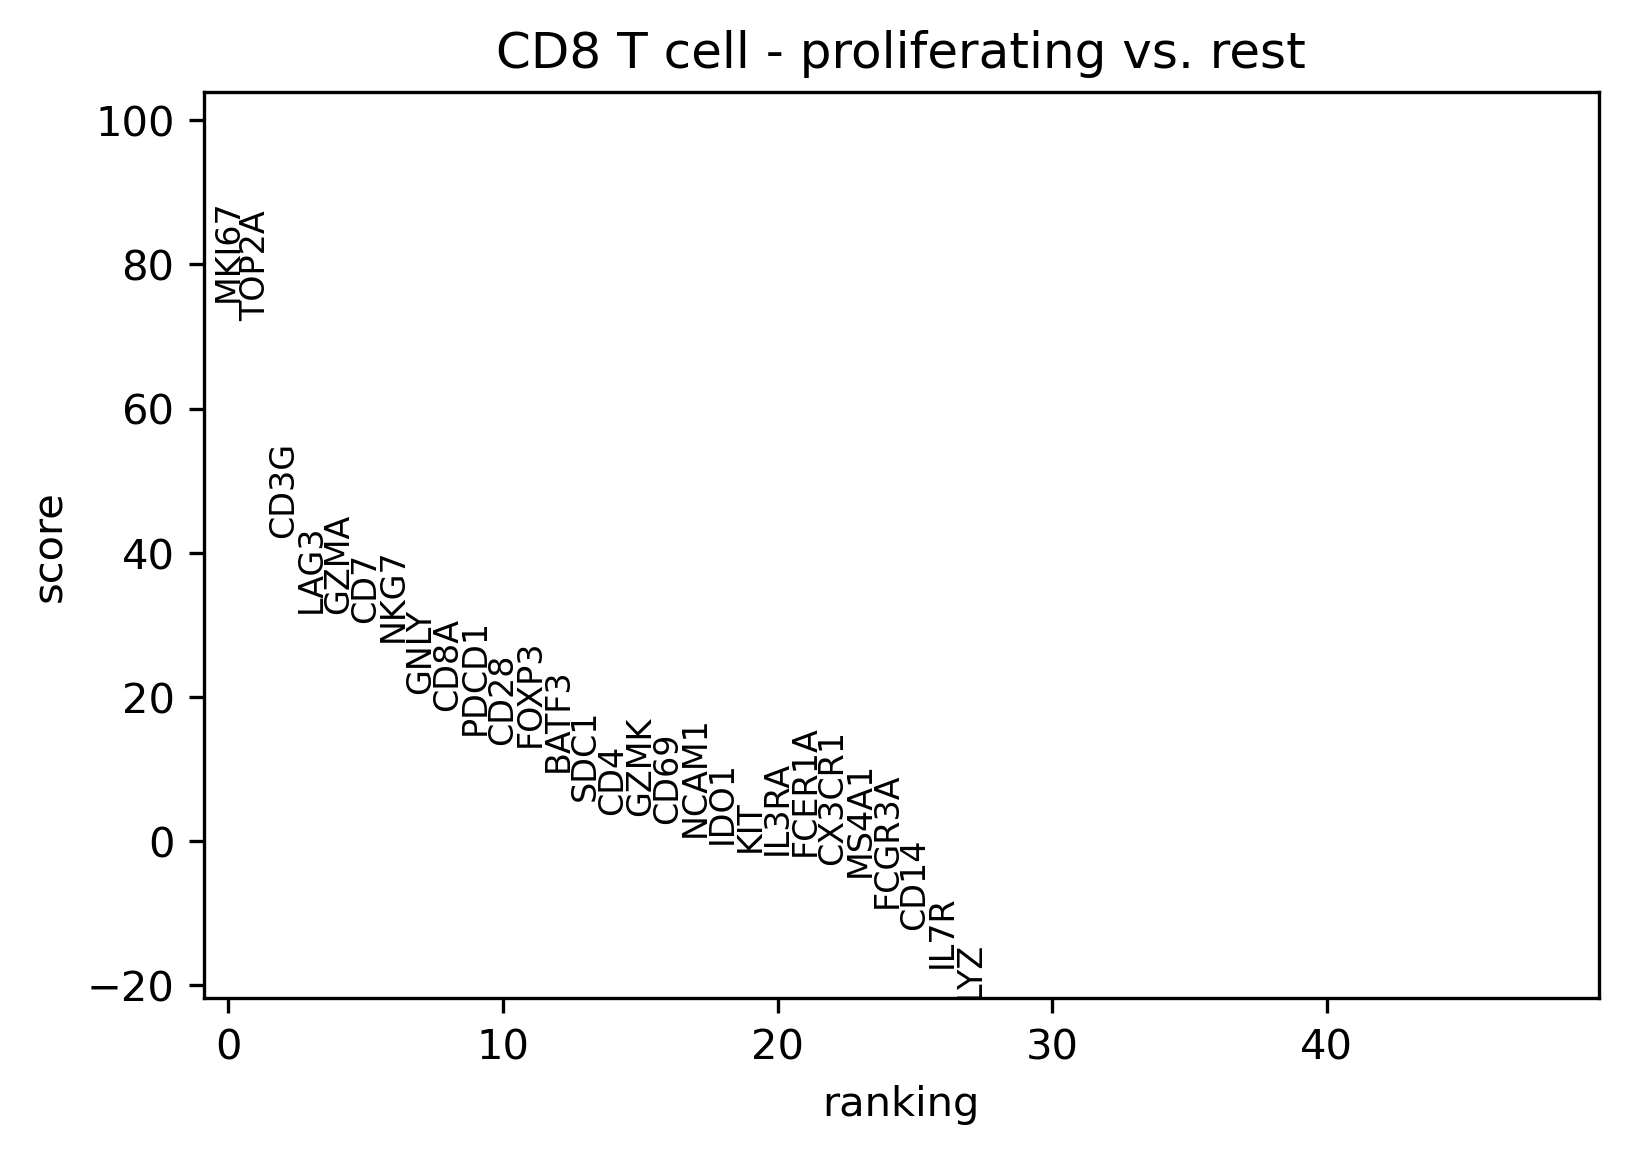

In [102]:
sc.pl.rank_genes_groups(expression, groups=['CD8 T cell - proliferating'], n_genes=50)

In [106]:
expression.uns['rank_genes_groups']['names']['CD8 T cell - proliferating']

array(['MKI67', 'TOP2A', 'CD3G', 'LAG3', 'GZMA', 'CD7', 'NKG7', 'GNLY',
       'CD8A', 'PDCD1', 'CD28', 'FOXP3', 'BATF3', 'SDC1', 'CD4', 'GZMK',
       'CD69', 'NCAM1', 'IDO1', 'KIT', 'IL3RA', 'FCER1A', 'CX3CR1',
       'MS4A1', 'FCGR3A', 'CD14', 'IL7R', 'LYZ'], dtype=object)

In [107]:
expression

AnnData object with n_obs × n_vars = 390210 × 28
    obs: 'cell_type', 'predicted_cell_type', 'disease', 'model_dataset', 'manual_teir1_annotation'
    var: 'cell_type'
    uns: 'rank_genes_groups'
    obsm: 'pollock_embedding', 'pollock_umap'
    layers: 'logcounts'

###### for austin

In [7]:
explain

AnnData object with n_obs × n_vars = 4990 × 27131
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.5', 'seurat_clusters', 'cell_type', 'ident', 'predicted_cell_type', 'cell_type_probability', 'probability_B cell', 'probability_CD4 T cell', 'probability_CD4 T cell - activated', 'probability_CD4 T cell - exhausted', 'probability_CD8 T cell - CTL', 'probability_CD8 T cell - exhausted', 'probability_CD8 T cell - preexhausted', 'probability_CD8 T cell - proliferating', 'probability_Mast', 'probability_Monocyte/Macrophage', 'probability_NK', 'probability_NKT', 'probability_Plasma', 'probability_Treg', 'probability_cDC1', 'probability_cDC2', 'probability_pDC', 'disease', 'leiden'
    var: 'mean', 'std'
    uns: 'dendrogram_predicted_cell_type', 'leiden', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [18]:
explain.uns['rank_genes_groups']['names']['CD8 T cell - proliferating']

dict_keys(['logfoldchanges', 'names', 'params', 'pvals', 'pvals_adj', 'scores'])

In [20]:
explain.uns['rank_genes_groups']['scores']['CD8 T cell - proliferating']

array([ 19.628454,  19.002018,  18.361155, ..., -17.031021, -17.04673 ,
       -17.062437], dtype=float32)

In [10]:
explain.uns['rank_genes_groups']['names'].keys()

AttributeError: 'numpy.ndarray' object has no attribute 'keys'

In [11]:
cts = sorted(set(explain.obs['predicted_cell_type']))
cts

['B cell',
 'CD4 T cell',
 'CD4 T cell - activated',
 'CD4 T cell - exhausted',
 'CD8 T cell - CTL',
 'CD8 T cell - exhausted',
 'CD8 T cell - preexhausted',
 'CD8 T cell - proliferating',
 'Mast',
 'Monocyte/Macrophage',
 'NK',
 'NKT',
 'Plasma',
 'Treg',
 'cDC1',
 'cDC2',
 'pDC']

In [24]:
import pandas as pd
data = []
n = 10
for ct in cts:
    genes = explain.uns['rank_genes_groups']['names'][ct][:n]
    scores = explain.uns['rank_genes_groups']['scores'][ct][:n]
    for g, s in zip(genes, scores):
        data.append([ct, g, s])
df = pd.DataFrame(data=data, columns=['cell type', 'gene', 'score'])
df

,cell type,gene,score
0,B cell,MS4A1,20.063290
1,B cell,SIGIRR,18.964689
2,B cell,PPP2R1B,18.443789
3,B cell,BANK1,18.227343
4,B cell,CSNK1G3,18.216059
...,...,...,...
165,pDC,TSPAN13,21.517727
166,pDC,SEC61B,21.509872
167,pDC,IL3RA,21.303802
168,pDC,PPP1R14B,20.789474


In [25]:
df.to_csv('/home/estorrs/sandbox/markers_for_austin.txt', sep='\t', index=False)